<a href="https://colab.research.google.com/github/jordisc97/Agile-Data-Science/blob/master/Superheroes_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek 
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.utils import class_weight
from keras import optimizers
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [66]:
from google.colab import files
train = files.upload()

Saving train.csv to train (2).csv


In [68]:
from google.colab import files
test = files.upload()

Saving test.csv to test (1).csv


In [69]:
import io
train = pd.read_csv(io.BytesIO(train['train.csv']))
test = pd.read_csv(io.BytesIO(test['test.csv']))

train
    

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,NaN,213.0,Dark Horse Comics,NaN,bad,234.0,False,True,False,False,True,True,True,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,True,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,Fal

In [70]:
# (1) - Read Data
# data_path = os.path.join(os.getcwd(), 'train.csv')
# train = pd.read_csv(data_path, delimiter = ',')

# data_path = os.path.join(os.getcwd(), 'test.csv')
# test = pd.read_csv(data_path, delimiter = ',')

num_columns = len(train.columns)
pd.set_option("display.max_columns", num_columns)
train

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,NaN,213.0,Dark Horse Comics,NaN,bad,234.0,False,True,False,False,True,True,True,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,True,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,Fal

## Exploratory analysis of the Data

In [71]:
train.describe()
# Note the outliers in Height and Weight, thus:

def lose_weight_height(data):
    data["Height"]=data["Height"].clip_lower(0)
    data["Weight"]=data["Weight"].clip_lower(0)

lose_weight_height(train)
lose_weight_height(test)

train

,Id,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,0,Male,NaN,Yautja,NaN,213.0,Dark Horse Comics,NaN,bad,234.0,False,True,False,False,True,True,True,False,False,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,1,Male,brown,Human,Brown,185.0,Marvel Comics,NaN,good,86.0,True,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,Fal

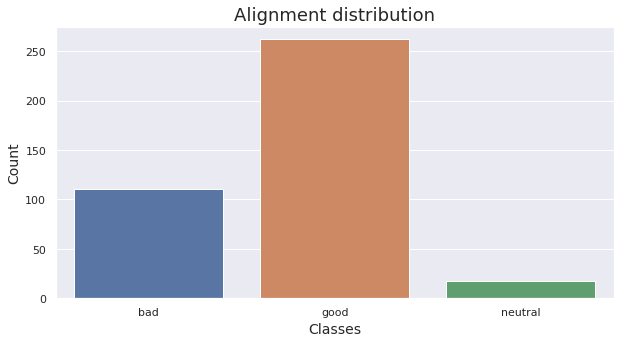

In [72]:
# Visualize the predicted value.
fig, ax = plt.subplots()
plt.gcf().set_size_inches((10,5))
sns.set(style="darkgrid")
fig.set_facecolor('w')
ax = sns.countplot(x="Alignment", data=train)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Alignment distribution' , fontsize=18)
plt.show()
## IDEA: We could use oversampling techniques like SMOTE.

In [73]:
# Columns we want to binarize:
col_v = ['Gender', 'Eye color','Race','Hair color', 'Publisher','Skin color']


def one_hot_encoding(data,col_v):
    for col in col_v:
        data = pd.concat([data, pd.get_dummies(data[col])], axis=1)
        data = data.drop(columns = [col])
        data = data*1 #Transform the True/False entries to binary encoded.
    return data

train_process = one_hot_encoding(train,col_v)
test_process = one_hot_encoding(test,col_v)

train_process

,Id,Height,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,...,Dathomirian Zabrak,Demi-God,Demon,Eternal,Flora Colossus,God / Eternal,Gorilla,Gungan,Human,Human / Altered,Human / Clone,Human / Cosmic,Human / Radiation,Human-Kree,Human-Vuldarian,Icthyo Sapien,Inhuman,Korugaran,Kryptonian,Luphomoid,Metahuman,Mutant,New God,Neyaphem,Rodian,Spartoi,Symbiote,Talokite,Tamaranean,Ungaran,Vampire,Yautja,Yoda's species,Zen-Whoberian,Zombie,Auburn,Black,Blond,Blue,Brown,Brown / Black,Brown / White,Gold,Green,Grey,Magenta,No Hair,Orange,Orange / White,Pink,Purple,Red,Red / Orange,Silver,Strawberry Blond,White,black,blond,ABC Studios,DC Comics,Dark Horse Comics,George Lucas,HarperCollins,IDW Publishing,Icon Comics,Image Comics,J. K. Rowling,Marvel Comics,NBC - Heroes,Rebellion,Shueisha,Star Trek,SyFy,Team Epic TV,Wildstorm,blue,gold,green,grey,orange,orange / white,pink,purple,red,red / black,silver,white,yellow
0,0,213.0,bad,234.0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,185.0,good,86.0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,175.0,good,143.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,168.0,good,52.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,163.0,good,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,178.0,good,81.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,

In [0]:
# (2) - Split
X_train = train_process.drop('Alignment', axis=1)
y_train = train_process['Alignment']

X_test = test_process

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, 
                                                y_train, 
                                                train_size=0.75, 
                                                random_state = 42
                                               )
# Feature Scaling
sc = StandardScaler()  
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)  
Xtest = sc.transform(Xtest)  

## Baseline Classifier

In [118]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier().fit(Xtrain, ytrain) 
pred_y_d = dummy_classifier.predict(Xtest)
print('Dummy Classifier accuracy on the validation set: {:.5f}'.format(accuracy_score(ytest,pred_y_d)))

Dummy Classifier accuracy on the validation set: 0.54082


## Random Forest

In [0]:
param_grid = { 
    'n_estimators': [2, 10, 25],
    'max_depth' : [2, 10, 15],
}

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Random forest
clf_rf = RandomForestClassifier(criterion='gini',
                                random_state=0)

clf_rf_grid = GridSearchCV(clf_rf, param_grid, cv=10)

# Train model
model = clf_rf_grid.fit(Xtrain, ytrain)

In [0]:
y_pred = clf_rf_grid.predict(Xtrain) 
y_test_pred = clf_rf_grid.predict(Xtest)

In [122]:
print('Classification accuracy on training set: {:.5f}'.format(accuracy_score(ytrain,y_pred)))
print('\nClassification accuracy on validation set: {:.5f}'.format(accuracy_score(ytest,y_test_pred)))

Classification accuracy on training set: 0.84642

Classification accuracy on validation set: 0.72449


## Neural Network

In [0]:
# get shapes
N, D = Xtrain.shape
K = len(set(ytest))

def category_to_num(data):
    data = np.where(data=='good', 0, data)
    data = np.where(data=='neutral', 1, data) 
    data = np.where(data=='bad', 2, data) 
    data=data.astype('int')
    return data

ytest = category_to_num(ytest)
ytrain = category_to_num(ytrain)


In [133]:
# the model will be a sequence of layers
model = Sequential()

model.add(Dense(units=128, input_dim=D))
model.add(Activation('relu'))

model.add(Dense(units=128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=512)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=K))
model.add(BatchNormalization())
model.add(Activation('softmax'))

from keras import optimizers
from keras.optimizers import SGD

# sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.98, nesterov=True)
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer='Adam',
#               optimizer = sgd, 
              metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_162 (Dense)            (None, 128)               37248     
_________________________________________________________________
activation_162 (Activation)  (None, 128)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 128)               16512     
_________________________________________________________________
batch_normalization_139 (Bat (None, 128)               512       
_________________________________________________________________
activation_163 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_116 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 256)             

In [134]:
fited_model = model.fit(Xtrain, ytrain, 
                        validation_data=(Xtest, ytest), 
                        epochs=25, 
                        batch_size=10,
                        verbose=1)

Train on 293 samples, validate on 98 samples
Epoch 1/25
293/293 [==============================] - 9s 32ms/step - loss: 1.4238 - acc: 0.3140 - val_loss: 1.1769 - val_acc: 0.2347
Epoch 2/25
293/293 [==============================] - 0s 1ms/step - loss: 1.3499 - acc: 0.3993 - val_loss: 1.1903 - val_acc: 0.2449
Epoch 3/25
293/293 [==============================] - 0s 1ms/step - loss: 1.2127 - acc: 0.3857 - val_loss: 1.1669 - val_acc: 0.2347
Epoch 4/25
293/293 [==============================] - 0s 1ms/step - loss: 1.1830 - acc: 0.4164 - val_loss: 1.1206 - val_acc: 0.3265
Epoch 5/25
293/293 [==============================] - 0s 1ms/step - loss: 1.1692 - acc: 0.3754 - val_loss: 1.0678 - val_acc: 0.3469
Epoch 6/25
293/293 [==============================] - 0s 1ms/step - loss: 1.0814 - acc: 0.4471 - val_loss: 1.0303 - val_acc: 0.6020
Epoch 7/25
293/293 [==============================] - 0s 1ms/step - loss: 1.0624 - acc: 0.4266 - val_loss: 0.9978 - val_acc: 0.6429
Epoch 8/25
293/293 [==========

In [135]:
### Check the accuracy and the loss of the training set.
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))
print('')
### Also check for the testing set.
loss, accuracy = model.evaluate(Xtest, ytest, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.788396
Loss: 0.698287

Accuracy: 0.744898
Loss: 0.771915


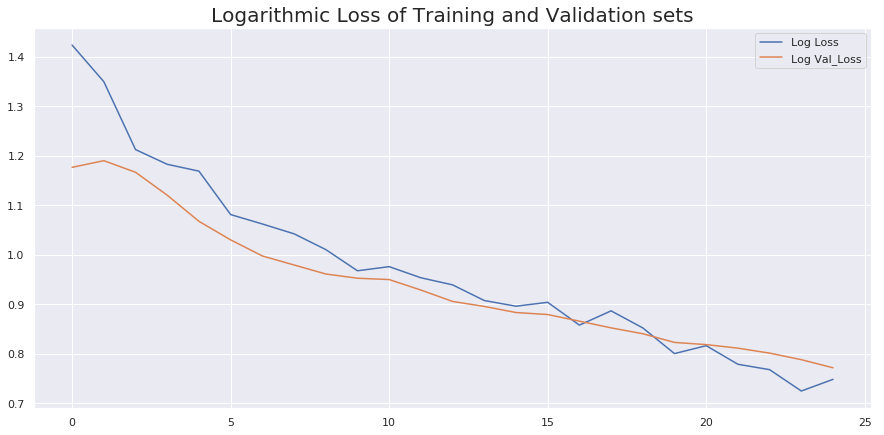

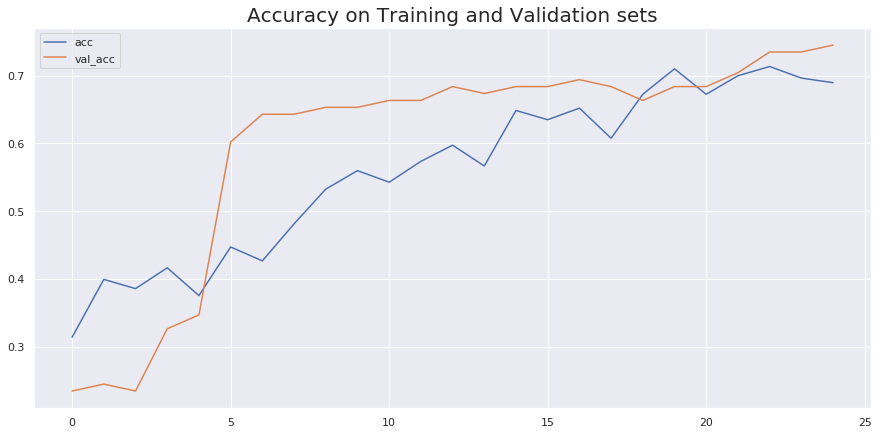

In [136]:
# plot some data
fig = plt.figure(figsize=(15,7))

plt.plot(fited_model.history['loss'], label='Log Loss')
plt.plot(fited_model.history['val_loss'], label='Log Val_Loss')
plt.title('Logarithmic Loss of Training and Validation sets', fontsize=20)

plt.legend()
plt.show()

fig = plt.figure(figsize=(15,7))
plt.plot(fited_model.history['acc'], label='acc')
plt.plot(fited_model.history['val_acc'], label='val_acc')
plt.title('Accuracy on Training and Validation sets', fontsize=20)
plt.legend()
plt.show()

## Gradient Boosting

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(Xtrain, ytrain)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(Xtrain, ytrain)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(Xtest, ytest)))


Learning rate:  0.05
Accuracy score (training): 0.652
Accuracy score (validation): 0.724
Learning rate:  0.075
Accuracy score (training): 0.652
Accuracy score (validation): 0.724
Learning rate:  0.1
Accuracy score (training): 0.652
Accuracy score (validation): 0.724
Learning rate:  0.25
Accuracy score (training): 0.696
Accuracy score (validation): 0.714
Learning rate:  0.5
Accuracy score (training): 0.765
Accuracy score (validation): 0.735
Learning rate:  0.75
Accuracy score (training): 0.788
Accuracy score (validation): 0.755
Learning rate:  1
Accuracy score (training): 0.809
Accuracy score (validation): 0.714
